In [402]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

lista = [[], []]


In [403]:
# Função de distância Euclidiana
def distanciaPontoAPonto(ponto1, ponto2):
    somaquadrados = 0
    for i in range(len(ponto1)):
        somaquadrados += np.square(ponto1[i] - ponto2[i])
    return np.sqrt(somaquadrados)


In [404]:
# Verifica se ainda pode adicionar vizinhos
def gerenciarK(k, lista, value):
    if len(lista) < k:
        return True
    else:
        for x in range(len(lista)):
            if lista[x] > value:
                return True
    return False


In [405]:
def implementak(k, valor, classe):
    if gerenciarK(k, lista[0], valor):
        if len(lista[0]) < k:
            lista[0].append(valor)
            lista[1].append(classe)
        else:
            for x in range(len(lista[0])):
                if lista[0][x] > valor:
                    lista[0].pop()
                    lista[0].insert(x, valor)
                    lista[1].pop()
                    lista[1].insert(x, classe)
                    break

In [406]:
# Calcula os k vizinhos mais próximos de um ponto
def kvisinhos(ponto, k,data):
    global lista
    lista = [[], []]  # Reinicia a lista a cada chamada
    for i in range(len(data.data)):
        implementak(k, distanciaPontoAPonto(ponto, data.data[i]), data.target[i])


In [407]:
def achaindex(lista, valor):
    indexes = []
    for i in range(len(lista)):
        if lista[i] == valor:
            indexes.append(i)
    return indexes


In [408]:
# Conta quantos pontos de cada classe estão próximos
def pontos_pertos(ponto, k,data):
    json = {}
    kvisinhos(ponto, k,data)
    for x in range(3):
        json[x] = lista[1].count(x)
    return json

In [409]:
# Prever a classe com base nos vizinhos
def prever_classe(ponto, k,data):
    json = pontos_pertos(ponto, k,data)
    return max(json, key=json.get)


In [410]:
# Remove ponto do dataset
def delete_ponto(index,data):
    global iris
    data.data = np.delete(data.data, index, axis=0)
    data.target = np.delete(data.target, index, axis=0)

In [411]:
# Retorna ponto aleatório e sua classe
def ponto_aleatorio(data):
    index = random.randint(0, len(data.data) - 1)
    ponto = data.data[index]
    classe = data.target[index]
    delete_ponto(index,data)
    return ponto, classe


In [412]:
# Separa parte dos dados para teste (Holdout)
def holdout(data = datasets.load_iris()):
    teste=[]
    for i in range(int(len(data.data) * 0.2)):
        ponto, index = ponto_aleatorio(data)
        teste.append([ponto, index])
    return teste, data

In [413]:
def acuracy(k,data,teste):
    acertos = 0
    for ponto in teste:
        classe_prevista = prever_classe(ponto[0], k,data)
        classe = ponto[1]
        if classe_prevista == classe:
            acertos += 1
    return acertos/len(teste)


In [414]:
# Gera acurácia para vários valores de k
def acuracy_gera(MIN,MAX,repeticoes=1,data=datasets.load_iris()):
    acuracys = {}
    for k in range(MIN,MAX):
        acuracys[k] = 0
    for _ in range(repeticoes):
        teste,origin = holdout(data)
        for k in range(MIN,MAX):
            acuracys[k] += acuracy(k,origin,teste)
        data=datasets.load_iris()
    for x in acuracys:
        acuracys[x] /= repeticoes
    return acuracys

In [ ]:
def plotar_grafico():
    acuracys = acuracy_gera(10 ,20,100)
    x = list(acuracys.keys())
    y = list(acuracys.values())
    plt.plot(x, y)
    plt.title('Acurácia por valor de K')
    plt.xlabel('K')
    plt.ylabel('Acurácia')
    plt.show()


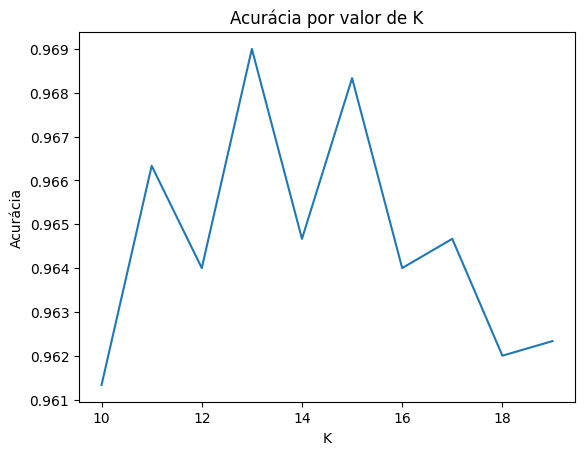

In [416]:
plotar_grafico()